In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Question 1

In [2]:
#define parameters
genome_size = 1000000
coverage = 5
read_size = 100

#make an zeros array for genome, calc number of reads
genome = np.zeros(genome_size)
num_reads = (genome_size * coverage) // read_size

In [3]:
#randomly cover the genome with reads, +1 if base is covered
for read in range(num_reads):
    pos = np.random.randint(1,genome_size-read_size)
    
    for idx in range(pos, pos+read_size):
        genome[idx] += 1

In [4]:
#make poisson distribution of coverage
x = np.arange(0, poisson.ppf(0.99,coverage))
y = poisson.pmf(x, coverage) * genome_size 

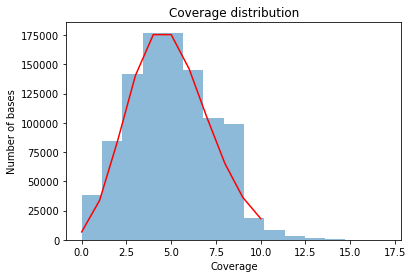

In [5]:
#plot histogram and poisson distribution together
fig, ax = plt.subplots()
ax.hist(genome, bins=coverage*3, alpha = .5)
ax.plot(x,y, color="red")

ax.set_title("Coverage distribution")
ax.set_ylabel("Number of bases")
ax.set_xlabel("Coverage")
plt.show()

In [6]:
#find simulated and poisson predicted num_unseq
num_unseq = 0

for base in genome:
    if base == 0:
        num_unseq += 1
        
print(num_unseq)
print(y[0])

6635
6737.946999085467


In [16]:
#turn above code into a function
def coverage_plot(genome_size, coverage, read_size):
    genome = np.zeros(genome_size)
    num_reads = (genome_size * coverage) // read_size
    
    for read in range(num_reads):
        pos = np.random.randint(1,genome_size-read_size)
    
        for idx in range(pos, pos+read_size):
            genome[idx] += 1
    
    x = np.arange(0,poisson.ppf(0.99, coverage))
    y = poisson.pmf(x, coverage) * genome_size
    
    fig, ax = plt.subplots()
    ax.hist(genome, bins=coverage*3, alpha = .5)
    ax.plot(x,y, color="red")

    ax.set_title("Coverage distribution")
    ax.set_ylabel("Number of bases")
    ax.set_xlabel("Coverage")
    
    plt.show()
    
    num_unseq = 0

    for base in genome:
        if base == 0:
            num_unseq += 1
        
    print(num_unseq)
    print(y[0])

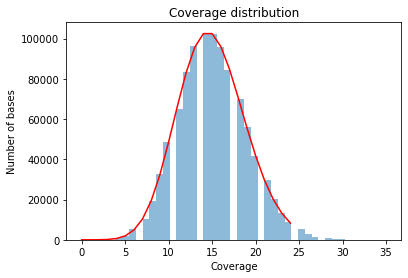

5
0.3059023205018258


In [17]:
#feed input for finding 15x coverage distribution
genome_size = 1000000
coverage = 15
read_size = 100

coverage_plot(genome_size, coverage, read_size)

# Question 2

In [229]:
#import library for making network graphs
import networkx as nx

In [242]:
reads = ["ATTCA", "ATTGA", "CATTG", "CTTAT", 
         "GATTG", "TATTT", "TCATT", "TCTTA", 
         "TGATT", "TTATT", "TTCAT", "TTCTT", 
         "TTGAT"]

#define kmer finder function
def kmer_find(readlist, k):
    kmerset = set()
    
    for read in readlist:
        for i in range(len(read)-k+1):
            kmer = read[i:i+k]
            kmerset.add(kmer)
    return kmerset

#obtain set of kmers and k-1mers
k=3

kmers = kmer_find(reads,k)   
print(kmers)

{'TTT', 'CAT', 'TTC', 'ATT', 'TTA', 'CTT', 'TCT', 'GAT', 'TAT', 'TCA', 'TTG', 'TGA'}


In [243]:
#make a directed graph using networkx
debruijn = nx.DiGraph()

In [244]:
#make k-1mer nodes and edges
nodes = set()
edges = []
edge_dict = {}
for kmer in kmers:
    kmer1 = kmer[:-1]
    kmer2 = kmer[1:]
    
    nodes.add(kmer1)
    nodes.add(kmer2)
    
    edges.append((kmer1, kmer2))
    edge_dict[(kmer1, kmer2)] = kmer

In [245]:
print(nodes)
print(edges)

{'CT', 'TG', 'TA', 'GA', 'TC', 'TT', 'AT', 'CA'}
[('TT', 'TT'), ('CA', 'AT'), ('TT', 'TC'), ('AT', 'TT'), ('TT', 'TA'), ('CT', 'TT'), ('TC', 'CT'), ('GA', 'AT'), ('TA', 'AT'), ('TC', 'CA'), ('TT', 'TG'), ('TG', 'GA')]


In [246]:
debruijn.add_edges_from(edges)

{('TT', 'TT'): Text(-1.0, -0.3442622950819672, 'TTT'),
 ('CA', 'AT'): Text(0.2459016393442623, -0.016393442622950824, 'CAT'),
 ('TT', 'TC'): Text(-0.21311475409836061, -0.3442622950819672, 'TTC'),
 ('AT', 'TT'): Text(-0.4098360655737705, -0.14754098360655737, 'ATT'),
 ('TT', 'TA'): Text(-0.5409836065573771, -0.08196721311475409, 'TTA'),
 ('CT', 'TT'): Text(-0.3442622950819672, -0.2786885245901639, 'CTT'),
 ('TC', 'CT'): Text(0.4426229508196722, -0.2786885245901639, 'TCT'),
 ('GA', 'AT'): Text(0.04918032786885246, 0.18032786885245902, 'GAT'),
 ('TA', 'AT'): Text(0.04918032786885246, 0.11475409836065574, 'TAT'),
 ('TC', 'CA'): Text(0.4426229508196722, -0.21311475409836067, 'TCA'),
 ('TT', 'TG'): Text(-0.6065573770491803, 0.049180327868852486, 'TTG'),
 ('TG', 'GA'): Text(-0.14754098360655737, 0.3770491803278689, 'TGA')}

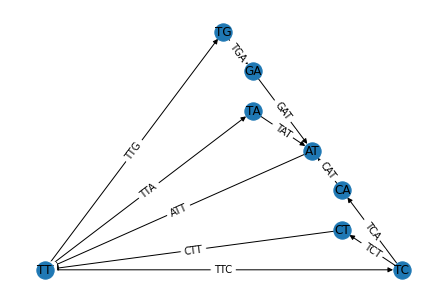

In [247]:
nx.draw_planar(debruijn)
pos = nx.planar_layout(debruijn)

nx.draw_networkx_labels(debruijn, pos)
nx.draw_networkx_edge_labels(debruijn, pos, edge_labels = edge_dict)